In [43]:
import sys
sys.version

'3.9.1 (default, Dec 11 2020, 09:29:25) [MSC v.1916 64 bit (AMD64)]'

In [44]:
import yfinance as yf
yf.pdr_override()
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing

In [45]:
stocks = yf.download("CVNA VTI SPY VOO VXUS BND SBUX MSFT AAPL AMD", start="2018-12-31", end="2021-01-30")

[*********************100%***********************]  10 of 10 completed


In [46]:
adj_close = stocks['Adj Close']
adj_close.head()

,AAPL,AMD,BND,CVNA,MSFT,SBUX,SPY,VOO,VTI,VXUS
Date,,,,,,,,,,
2018-12-31,38.518612,18.459999,75.227890,32.709999,99.040863,61.935635,240.779007,221.112274,123.027496,44.652252
2019-01-02,38.562561,18.830000,75.379875,32.259998,98.602066,61.858704,241.029480,221.285492,123.123901,44.567146
2019-01-03,34.721451,17.049999,75.674278,30.190001,94.974693,59.175465,235.277832,216.003250,120.270630,44.065968
2019-01-04,36.203678,19.000000,75.446335,30.780001,99.391899,61.137402,243.158661,223.132797,124.251686,45.503307
2019-01-07,36.123104,20.570000,75.332375,33.169998,99.518669,61.137402,245.075882,224.806931,125.504807,45.645157


<AxesSubplot:xlabel='Date'>

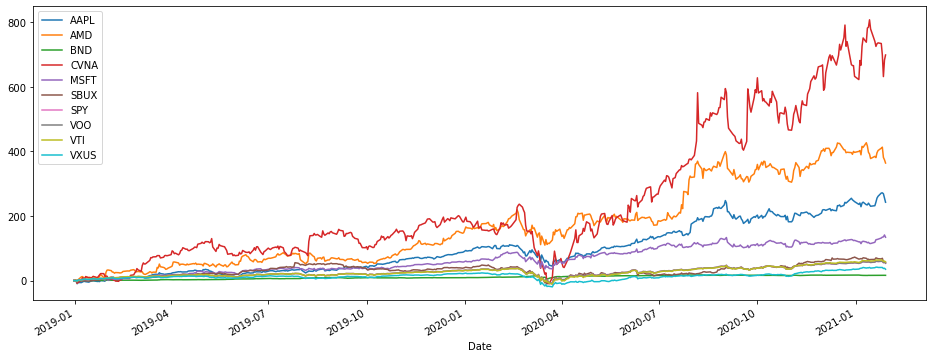

In [47]:
for symbol in adj_close:
    adj_close[symbol] = (adj_close[symbol]/adj_close[symbol].loc[adj_close[symbol].first_valid_index()] - 1) * 100

adj_close.plot(figsize=(16,6))

In [48]:
import plotly.express as px 

# Loading the iris dataset 
melted = pd.melt(adj_close, ignore_index = False)

fig = px.line(melted,y="value",  
              color="variable") 
fig.show()